In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    if x.is_integer():
        x = int(x)
    return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_all_inp' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 15 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [ ]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [5]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,seed,excess_return,excess_risk,sharpe,is_pareto
0,200.0,178.0,0,-0.058619,0.183273,-0.319845,True
1,100.0,316.0,0,-0.056433,0.183276,-0.307913,True
2,200.0,56.0,0,-0.053710,0.183297,-0.293022,True
3,100.0,562.0,0,-0.051472,0.183629,-0.280302,True
4,100.0,56.0,0,-0.042780,0.183649,-0.232946,True


In [6]:
gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]

GAMMA_PAIRS = list(zip(gamma_trade_list, gamma_risk_list))
#GAMMA_PAIRS

In [7]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=0.18327265370954007 - max=22.38443519044201
jump=1.4800775024488313


[1/15]	bracket=(0.18, 1.66)
[2/15]	bracket=(1.66, 3.14)
[3/15]	bracket=(3.14, 4.62)
[4/15]	bracket=(4.62, 6.1)
[5/15]	bracket=(6.1, 7.58)
[6/15]	bracket=(7.58, 9.06)
[7/15]	bracket=(9.06, 10.54)
[8/15]	bracket=(10.54, 12.02)
[9/15]	bracket=(12.02, 13.5)
[10/15]	bracket=(13.5, 14.98)
[11/15]	bracket=(14.98, 16.46)
[12/15]	bracket=(16.46, 17.94)
[13/15]	bracket=(17.94, 19.42)
[14/15]	bracket=(19.42, 20.9)
	no result for [15/15]


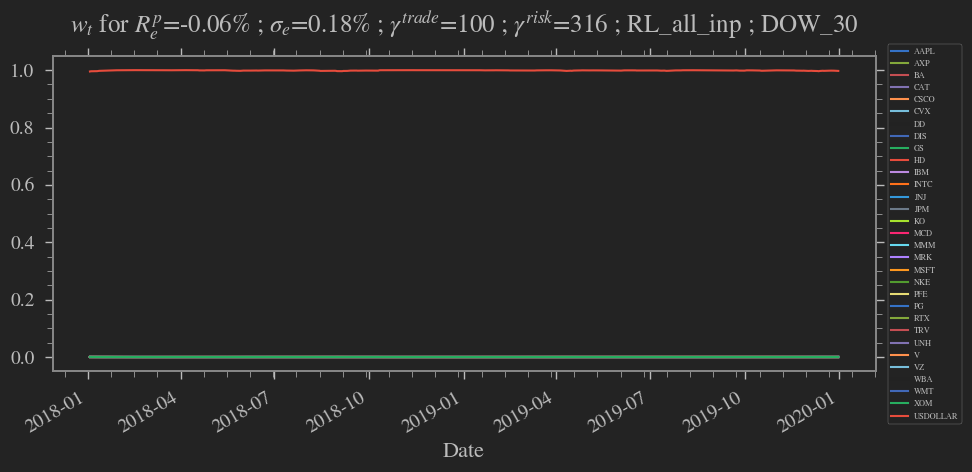

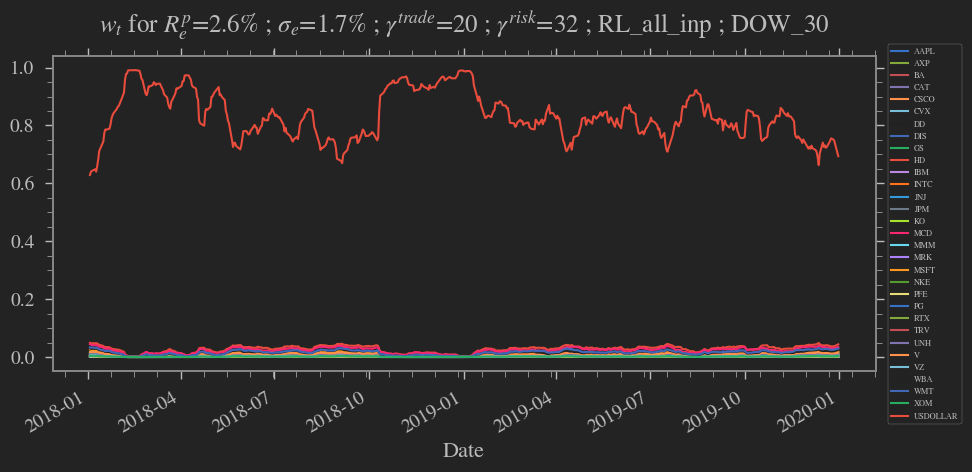

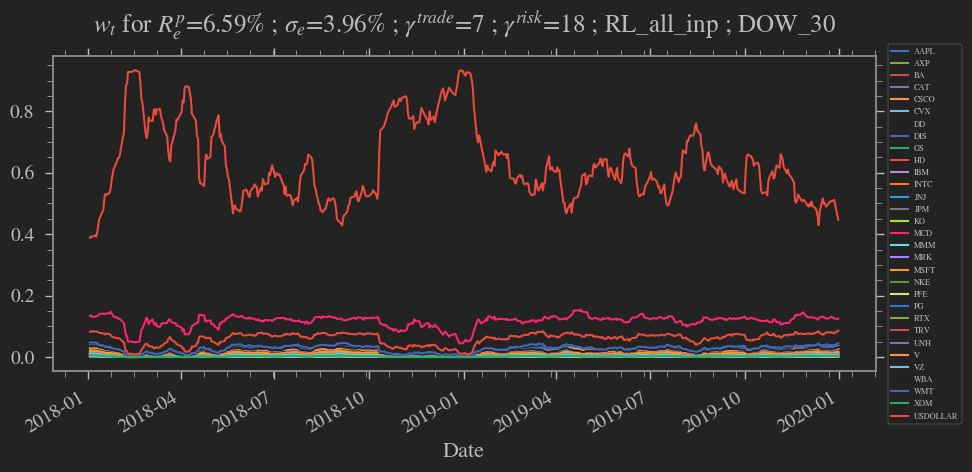

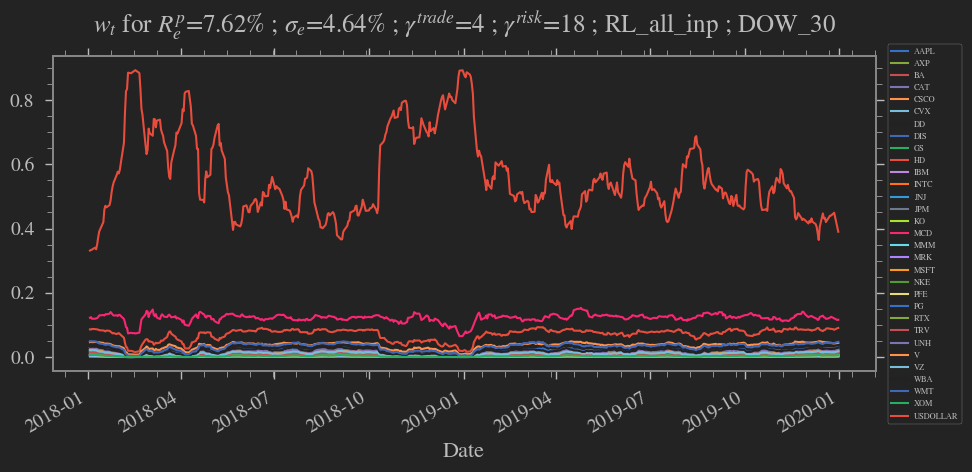

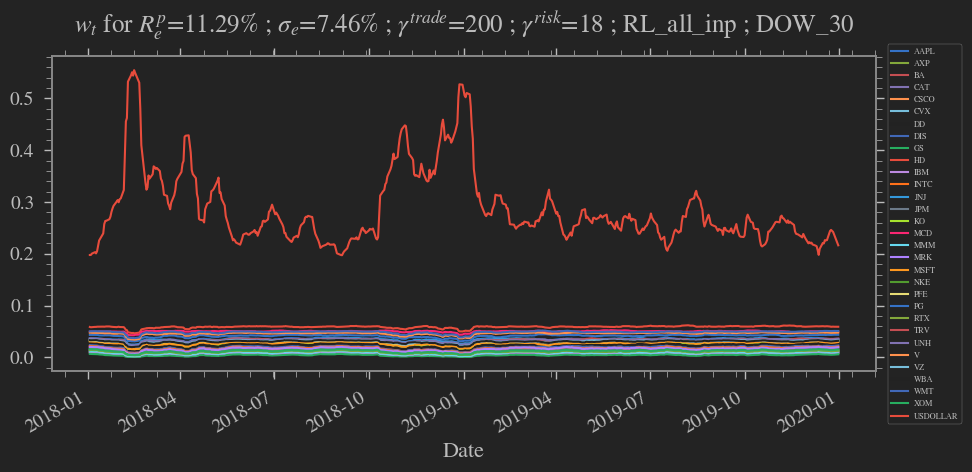

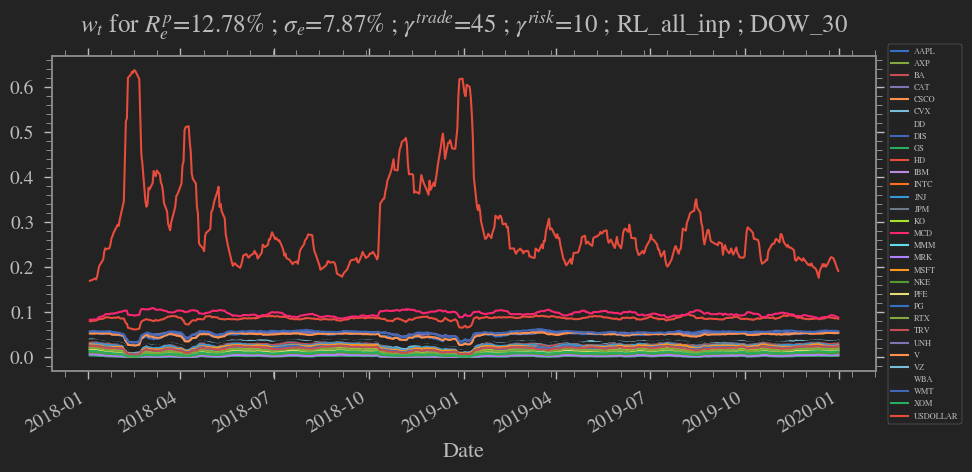

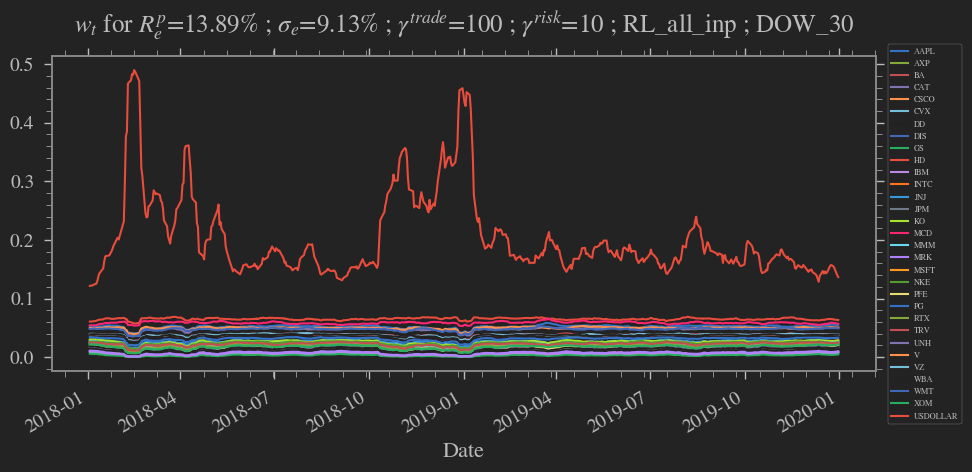

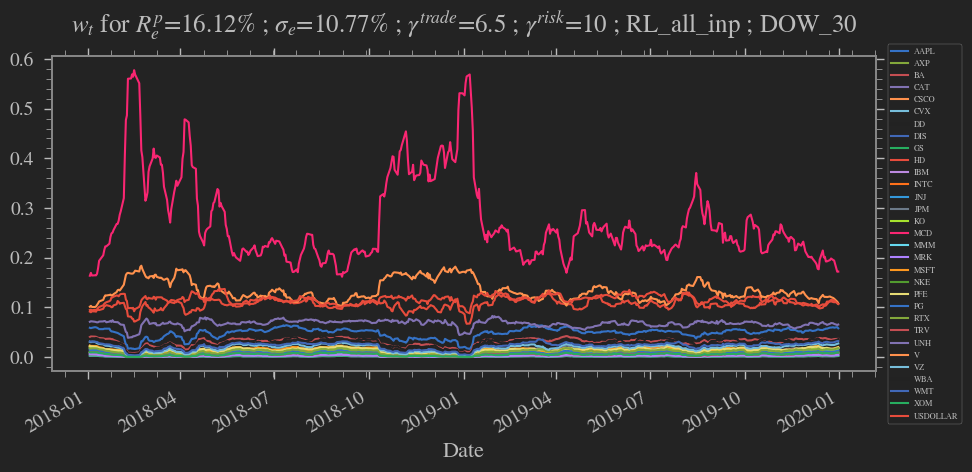

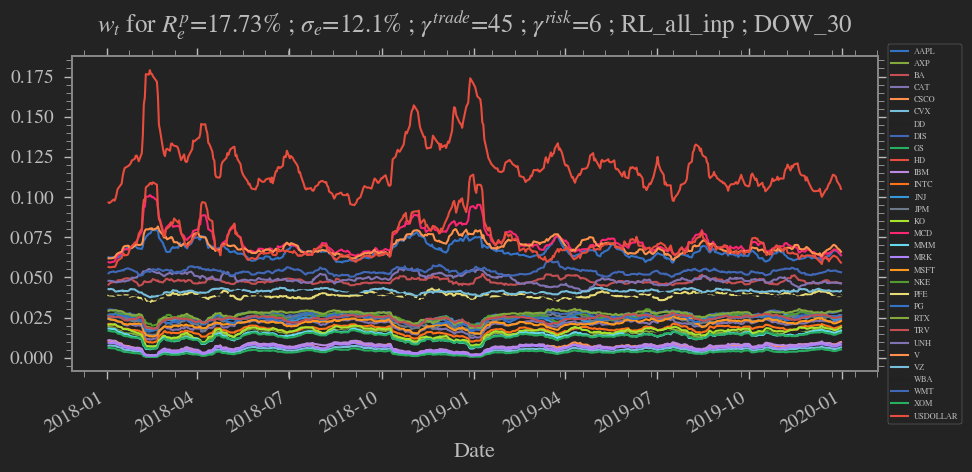

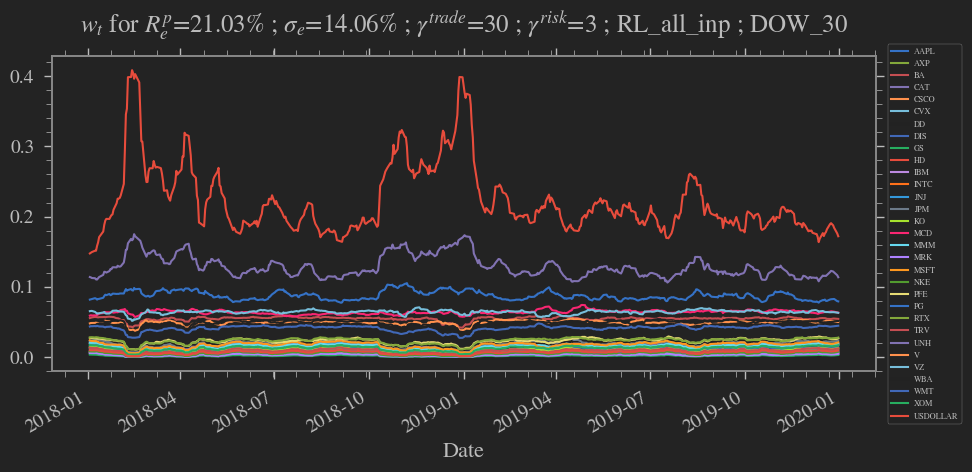

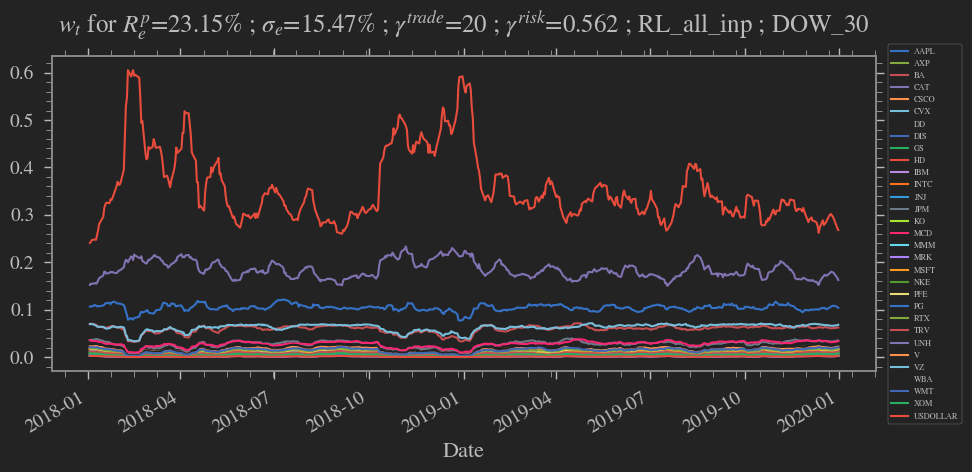

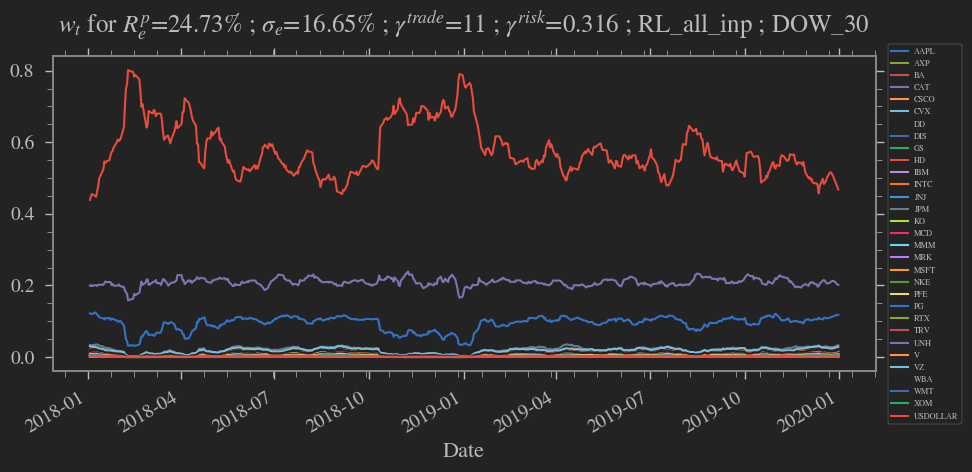

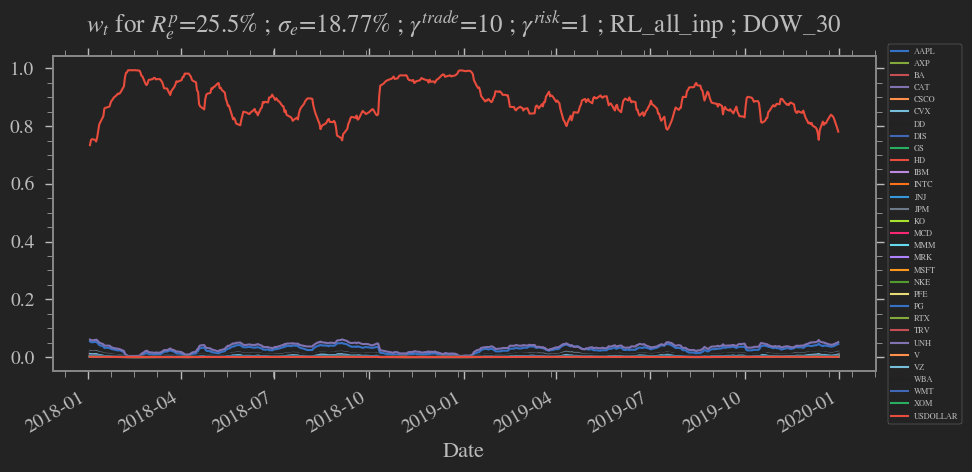

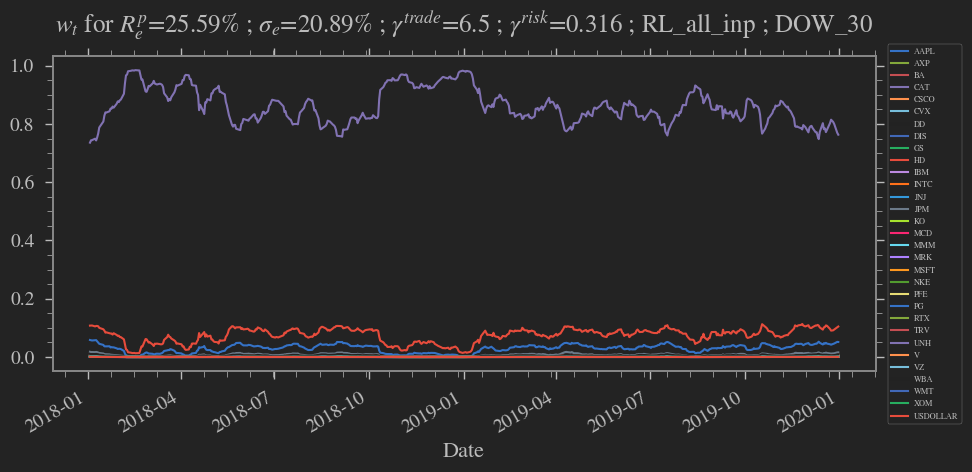

In [8]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]')#, e)

In [9]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.058427,0.003564,0.009269,0.001637,0.001152,0.000529,0.005982,0.002792,0.000857,0.107758,...,0.001137,0.001935,0.000636,0.735852,0.008553,0.005940,0.010611,0.001950,0.001786,0.000722
2018-01-04,0.057577,0.002936,0.009262,0.001577,0.001028,0.000468,0.005412,0.002501,0.000786,0.107910,...,0.001033,0.001757,0.000547,0.743801,0.008060,0.005363,0.010148,0.001769,0.001611,0.000642
2018-01-05,0.056709,0.002964,0.009114,0.001492,0.001000,0.000469,0.005428,0.002455,0.000810,0.108194,...,0.001015,0.001735,0.000547,0.744555,0.008058,0.005350,0.010314,0.001762,0.001615,0.000629
2018-01-08,0.057430,0.002806,0.008772,0.001428,0.000961,0.000444,0.005364,0.002405,0.000773,0.105047,...,0.000975,0.001658,0.000521,0.749551,0.007742,0.005074,0.010146,0.001725,0.001578,0.000629
2018-01-09,0.057939,0.002864,0.008989,0.001502,0.001030,0.000478,0.005711,0.002462,0.000823,0.106616,...,0.001042,0.001740,0.000557,0.743456,0.008175,0.005197,0.010582,0.001758,0.001651,0.000659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.042297,0.001504,0.005141,0.000629,0.000480,0.000181,0.002849,0.001398,0.000348,0.090548,...,0.000464,0.000972,0.000262,0.814705,0.004899,0.003291,0.006027,0.000934,0.000949,0.000293
2019-12-26,0.045101,0.001627,0.005661,0.000698,0.000537,0.000200,0.003076,0.001481,0.000387,0.091552,...,0.000519,0.001048,0.000290,0.807175,0.005014,0.003470,0.006443,0.001032,0.001045,0.000329
2019-12-27,0.046299,0.001756,0.005928,0.000751,0.000571,0.000217,0.003311,0.001604,0.000418,0.094183,...,0.000550,0.001113,0.000313,0.800298,0.005331,0.003674,0.006753,0.001108,0.001108,0.000358


In [10]:
print('done.')

done.
